# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
total_mice = len(merged_data_df['Mouse ID'].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_data_df[merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_rows['Mouse ID'].unique()
print(f'duplicate rows: \n{duplicate_rows}')
print(f'duplicate mice: {duplicate_mice}')

duplicate rows: 
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Femal

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data_df = merged_data_df[merged_data_df['Mouse ID'].isin(duplicate_mice)]
duplicate_mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_data_df[merged_data_df['Mouse ID'] != 'g989']
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = len(clean_data_df['Mouse ID'].unique())
total_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_by_drug = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_by_drug = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_by_drug = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_by_drug = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_by_drug = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_by_drug_df = pd.DataFrame({
    'Mean Tumor Volume': mean_by_drug,
    'Median Tumor Volume': median_by_drug,
    'Tumor Volume Variance': variance_by_drug,
    'Tumor Volume Std. Dev.': std_by_drug,
    'Tumor Volume Std. Err.': sem_by_drug
})

summary_by_drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_by_drug_df = clean_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_by_drug_df.style.set_caption('Tumor Volume (mm3)')

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

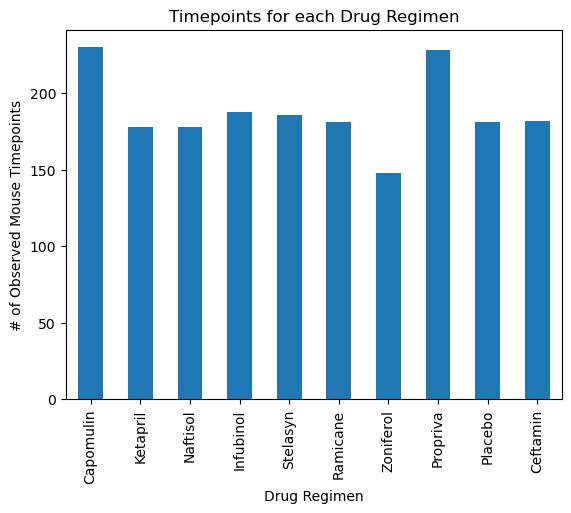

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

x_axis = clean_data_df['Drug Regimen'].unique()
y_axis = clean_data_df.groupby('Drug Regimen')['Timepoint'].count()
timepoints_per_drug_df = pd.DataFrame({'Drug Regimen': x_axis, 'Count': y_axis})
timepoints_per_drug_df.plot.bar(x='Drug Regimen', y='Count', rot=90, legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Timepoints for each Drug Regimen')
plt.show()

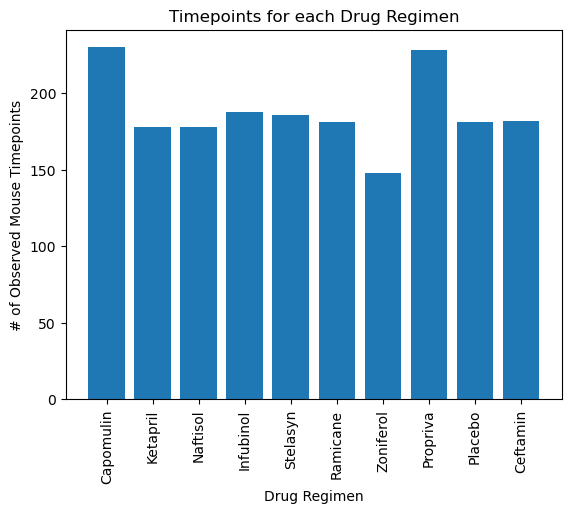

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_data_df['Drug Regimen'].unique()
y_axis = clean_data_df.groupby('Drug Regimen')['Timepoint'].count()
plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Timepoints for each Drug Regimen')
plt.xticks(rotation=90)
plt.show()

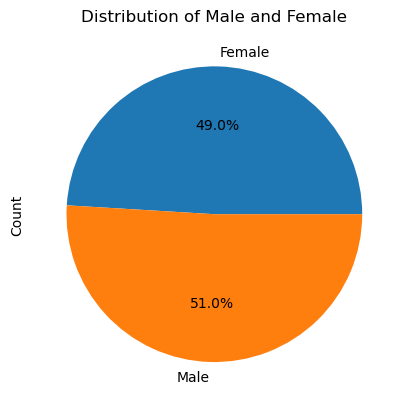

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = clean_data_df['Sex'].unique()
male_count = clean_data_df[clean_data_df['Sex']=='Male'].shape[0]
female_count = clean_data_df[clean_data_df['Sex']=='Female'].shape[0]
sizes = [female_count, male_count]
sex_population_df = pd.DataFrame({'Sex': labels, 'Count': sizes})
sex_population_df.plot.pie(y='Count', labels=sex_population_df['Sex'], autopct='%1.1f%%', legend=False)
plt.title('Distribution of Male and Female')
plt.show()

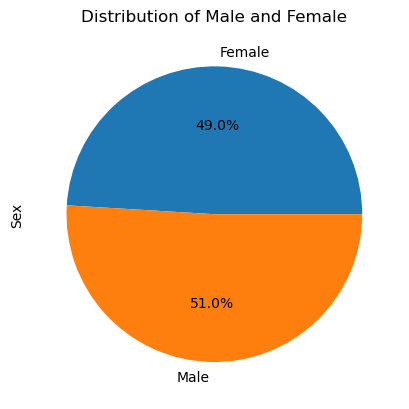

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_data_df['Sex'].unique()
male_count = clean_data_df[clean_data_df['Sex']=='Male'].shape[0]
female_count = clean_data_df[clean_data_df['Sex']=='Female'].shape[0]
sizes = [female_count, male_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Male and Female')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint_per_mouse = clean_data_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(clean_data_df, final_timepoint_per_mouse, on=['Mouse ID','Timepoint'])
final_tumor_volume_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# add subset 
for treatment in treatments:
    treatment_data = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volume_data.append(treatment_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(len(treatments)):
        quartiles = tumor_volume_data[i].quantile([0.25, 0.50, 0.75])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
        treatment_data = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'] == treatments[i]]['Tumor Volume (mm3)']

    # Determine outliers using upper and lower bounds
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq

        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
        outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
        print(f'{treatments[i]}\'s potential outliers: {outliers}')


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


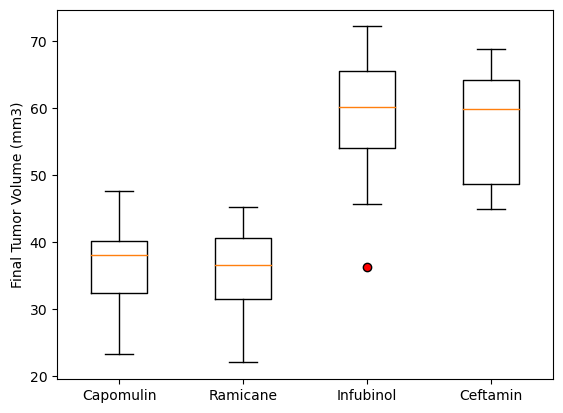

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([data.values for data in tumor_volume_data], labels=treatments, flierprops=dict(markerfacecolor='red'))
plt.show()

## Line and Scatter Plots

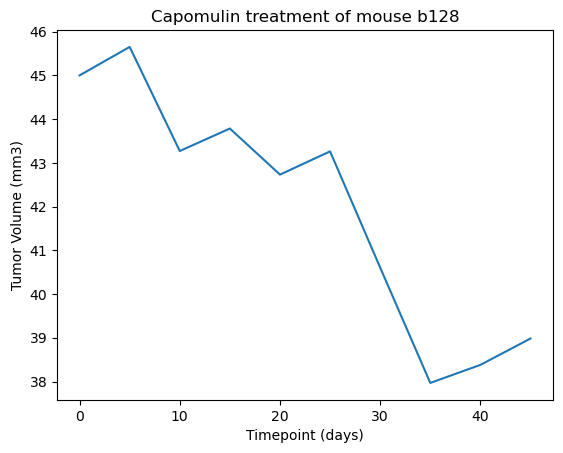

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data_df = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']
one_mouse_data_df = capomulin_data_df.loc[capomulin_data_df['Mouse ID'] == 'b128']
x_values = one_mouse_data_df['Timepoint']
y_values = one_mouse_data_df['Tumor Volume (mm3)']
plt.plot(x_values, y_values)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b128')
plt.show()

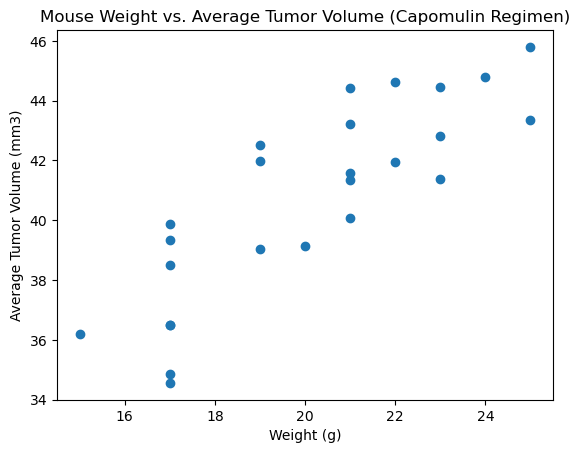

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data_df = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']
avg_data = capomulin_data_df.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


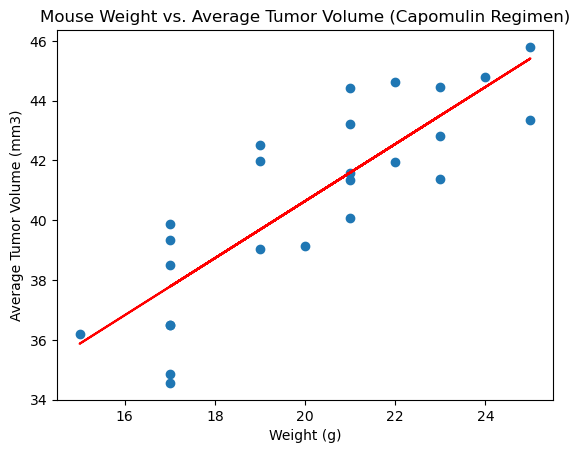

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = avg_data['Weight (g)'].corr(avg_data['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient, 2)}')
slope, intercept, r_value, p_value, std_err = st.linregress(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
fit_line = slope*avg_data['Weight (g)']+intercept
capomulin_data_df = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']
avg_data = capomulin_data_df.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.plot(avg_data['Weight (g)'], fit_line, color='red')
plt.show()